# Using Regressions for Financial Analysis

> Regression analysis quantifies the relatioship between a variable called dependent variable and one or more explanatory variables called independent variables

Regression analysis can be handy when trying to forecast a future dependent variable with the help of patterns from our historical data.

Going back to the housing prices example. The explanatory variable would be size as it helps us explain why certain houses cost more, and the dependent variable would be price as it is being explained. 

So the basic reasoning is that if we know the value of the explanatory variable, house size, we can determine the expected value of the dependent variable, house price. There are other variables that affect house price as well though. 

If we use only one variable in a regression, it's called a simple regression (or univariate regression). Regressions with more than one variable are called multivariate regressions. 

First, let's focus on a simple regression. 

Regression analysis assumes the existence of a linear relationship between the two variables. One straight line is the best fit and can help us describe the rapport beteween all the data points we see in the plot. 

How do we determine the best line to help us describe the relationship? By finding the line that minimizes the error observed between itself and actual observations.

General equation of a straight line:
$$y = mx + b$$

- m = slope
- b = y intercept

Using this, we can make a regression equation with a very similar shape:
$$ y = \alpha + \beta x$$

We'll get into the alpha and beta coefficients later on. 

Before that, we'll learn how to distinguish between regressions that are solid in terms of predictive capabilities and regressions that are weak and unreliable.

## Running a Regression in Python

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Housing.xlsx')
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


Since we're starting off with univariate regressions, we only need one independent variable: size.

In [4]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


### Univariate Regression

Python allows us to follow a very intuitive procedure for running a regression. We assign the data in the house size column to a variable we will call x. This information will stand for independent variable, while Y stands for house price.

In [5]:
x = data['House Size (sq.ft.)']
y = data['House Price']

In [6]:
x

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [7]:
y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

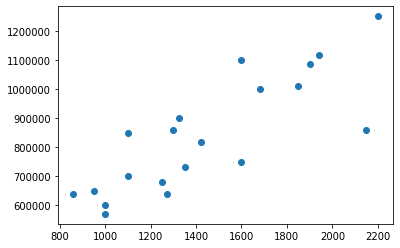

In [8]:
plt.scatter(x, y)
plt.show()

However, this isn't the best representation of the conclusions that can be drawn from this. We need to adjust the graph:

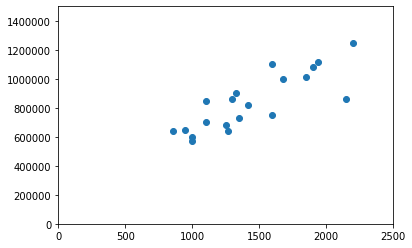

In [10]:
plt.scatter(x, y)
plt.axis([0, 2500, 0, 1500000])
plt.show()

This provides us with enough space to plot our observations.

Now, we can see that even the smallest of the houses in our sample costs a lot of money *and* we can get a better idea about the size to price ratio of our data. 

There is a little improvement we can add, adding the axes label. 

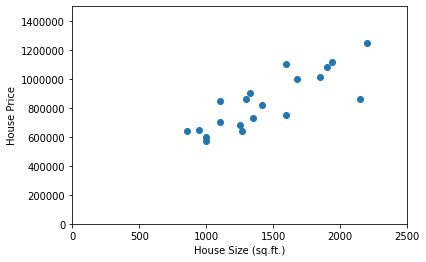

In [11]:
plt.scatter(x, y)
plt.axis([0, 2500, 0, 1500000])
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft.)')
plt.show()

## Are all regressions created equal? Learning how to distinguish good regressions

We know that size isn't the only variable that determines house price, examples include: location, neighbourhood, year of contruction. So, a simple regression will omit some important factors and will likely provide an estimate that deviates from the actual price. This doesn't mean a simple regression isn't useful, it can still have a high predictive power. However, it won't provide us an equation capable of estimating house prices with absolute precision. We can expect an error:
$$ y = \alpha + \beta x + error$$

When we talk about sample observations, the errors are called residuals in the x y plot. When we draw the regression line, the distance between the plots and the line is the residual. The best fitting line minimizes the squared sum of the distances of these residuals. The coefficients found with this technique are called OLS (Ordinary Least Square) estimates. We need to find a line that minimizes the distance between itself and the actual data observations we are using to calculate a regression. 

House size is one of the best indicators of house prices. Therefore it makes sense to explore the relationship between the two variables through a regression. It wouldn't make sense to use a regression between owners age and house prices. Some regressions have a higher expalnatory power than others. 

We need a tool that would allow us to measure such property and enable us to distinguish regressions with good, reasonable, and poor explanatory power. Luckily, we have R square.

To understand R square, we need to think of the total variability of the data which is the measure for data dispersion and variability. We use variance to measure the variability of data, so we'll use a concept very close to that: Total Sum of Squares.
$$TSS = \sum(x - \bar x)^2$$

TSS provides a sense of the variability of the data. We've alrady calculated the sum of the squared residuals to obtain the regression coefficients. Therefore, we can obtain R square with the following formula:
$$R^2 = 1 - \frac{SSR}{TSS}$$

Typically, R square is looked at as a percentage value and it can range from 0~100%. The higher it is, the greater the explanatory power of the regression model. 

Usually, a simple regression with an R square of less than 10% has little predictive power. One variable regressions with an R square of 30%+ are solid indicators of future performance. 

## Computing Alpha, Beta, and R Squared in Python

Now we will run a regression and will then focus on the interpretation of some statistics that can be obtained after running the regression. The stats models module contains tools to do this. The procedure to follow requires us to provide a constant. We will assign the newly obtained info, x, and the constant to a new variable. 

In [12]:
x1 = sm.add_constant(x)

reg = sm.OLS(y, x1).fit()

In [13]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           8.13e-06
Time:                        09:34:04   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared = 67.8%. This means that house size can explain 68% of the dependent variable. We can affirm that this model has good explanatory power, and thus it is a good model. 

In the next table, coef is our alpha. It is also the intercept in our regression. This means that when we draw the regression line the starting point of that line on the y axis will be 260,800.

Under that, we see 401.9163. This means that for every square foot increase of the size of a house, its price is expected to rise by 402 dollars. This coef is the value of the beta in our regression equation, or the slope of the regression line. 

On the other hand, the standard error of 65 tells us that this augmentation of 402 will typically vary within a range of 65. 

Lets test that:

In [14]:
260800 + 402 * 1000

662800

A note on python:

The statsmodels library allows us to apply a complete OLS model that provides three tables with multiple statistics. Alternatively, scipy's linregress allows us to extract five of these statistics very quickly. 

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [16]:
slope

401.91628631922595

In [17]:
intercept

260806.2360560964

In [18]:
r_value

0.8235775534696924

In [19]:
r_value**2

0.678279986579124

In [20]:
p_value

8.129642377231308e-06

In [21]:
std_err

65.24299510636492